In [2]:
#Q 1---
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

data = pd.read_csv('Mall_Customers.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:

# Perform one-hot encoding
data = pd.get_dummies(data, columns=['Genre'])
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False


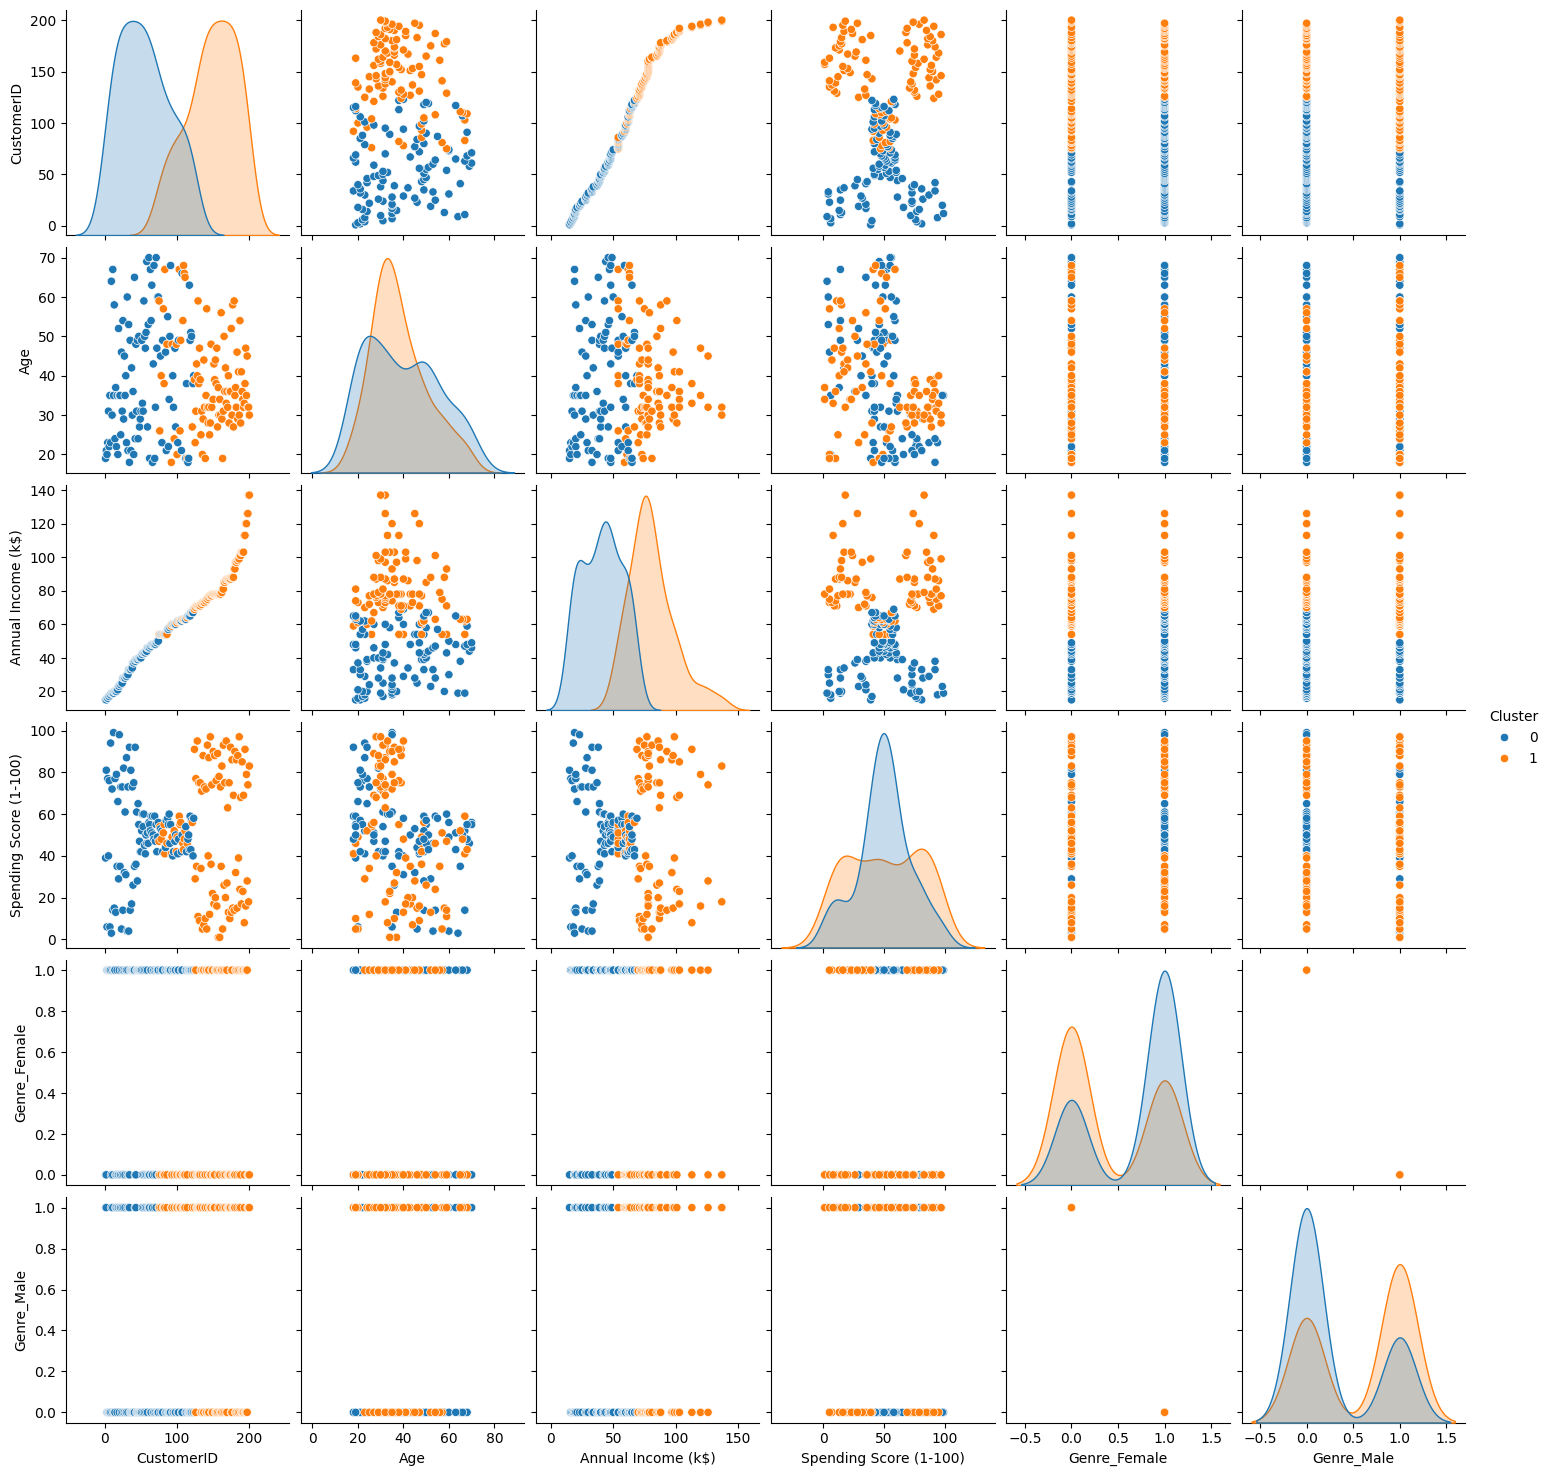

In [6]:


# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply K-Means with the optimal number of clusters (from the Elbow Method)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=2)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters

# Visualize the clusters
sns.pairplot(data, hue='Cluster', palette='tab10')
plt.show()

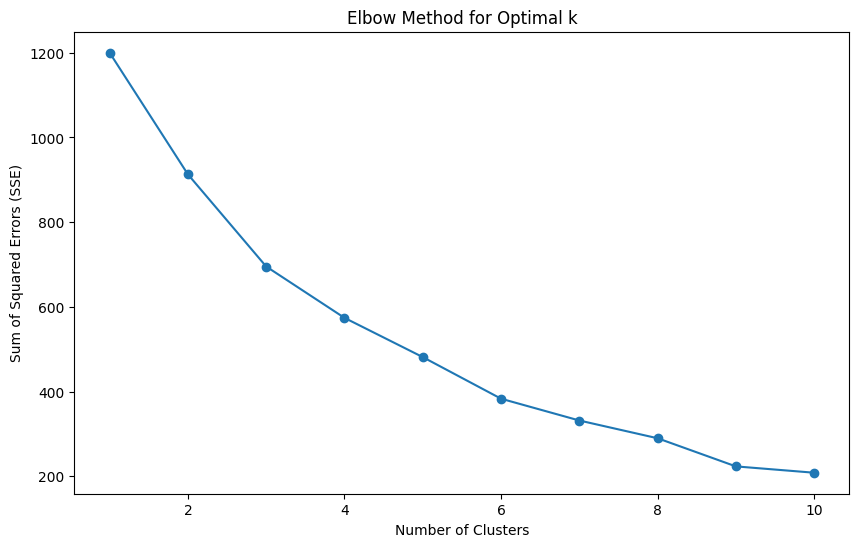

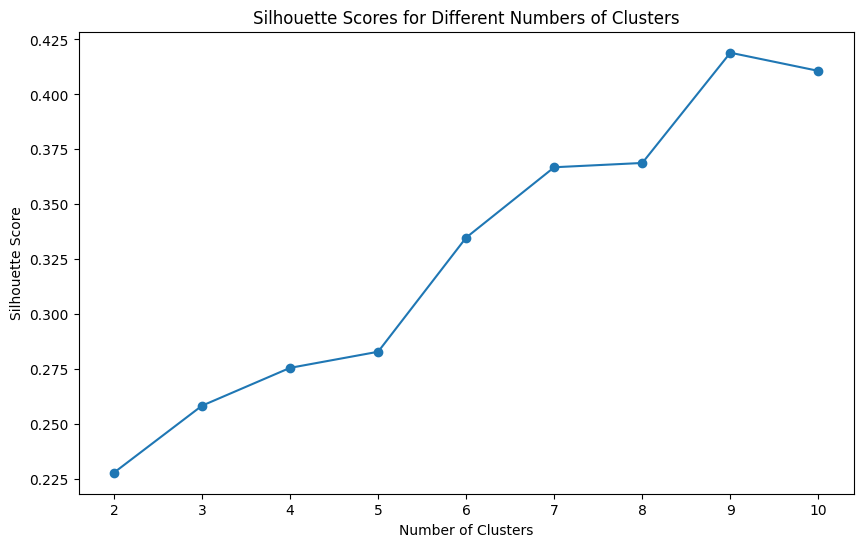

Optimal number of clusters based on Silhouette Score: 9


In [7]:
#Q 2--


# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=2)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette Scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=2)
    preds = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, preds)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

optimal_k_silhouette = range(2, 11)[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters based on Silhouette Score: {optimal_k_silhouette}')

In [ ]:
#Q 3--

Cluster 0: This cluster represents customers with diverse spending habits, particularly with high 
variability in the Fresh and Frozen categories. They have moderate spending in Milk, Grocery
Detergents_Paper, and Delicassen categories.
    
Cluster 1: This cluster consists of customers who tend to spend more on Milk, Grocery, 
and Detergents_Paper, indicating they might be more focused on these everyday products. 
They have moderate spending in other categories.

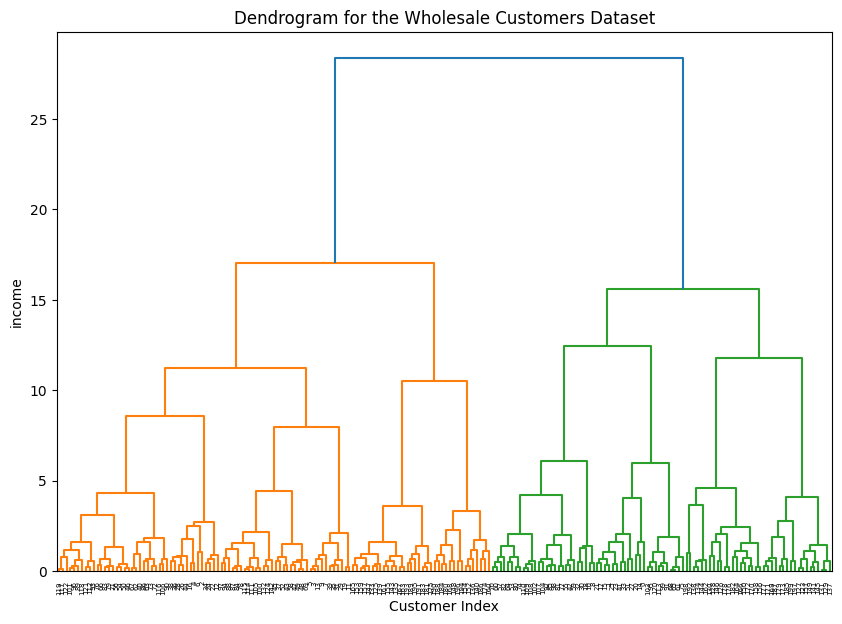

                       CustomerID        Age  Annual Income (k$)  \
Agglomerative Cluster                                              
0                       97.562500  38.098214           59.250000   
1                      104.238636  39.806818           62.227273   

                       Spending Score (1-100)  Genre_Female  Genre_Male  \
Agglomerative Cluster                                                     
0                                   51.526786           1.0         0.0   
1                                   48.511364           0.0         1.0   

                        Cluster  KMeans Cluster  
Agglomerative Cluster                            
0                      0.348214        0.348214  
1                      0.670455        0.670455  
                CustomerID        Age  Annual Income (k$)  \
KMeans Cluster                                              
0                54.901961  39.470588           41.009804   
1               147.959184  38.204082      

In [9]:
# Q 4--

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linked = linkage(data_scaled, method='ward')


plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for the Wholesale Customers Dataset')
plt.xlabel('Customer Index')
plt.ylabel('income')
plt.show()

agg_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agg_cluster_labels = agg_cluster.fit_predict(data_scaled)

kmeans = KMeans(n_clusters=2, random_state=2)
kmeans_labels = kmeans.fit_predict(data_scaled)


data['Agglomerative Cluster'] = agg_cluster_labels
data['KMeans Cluster'] = kmeans_labels

print(data.groupby('Agglomerative Cluster').mean())
print(data.groupby('KMeans Cluster').mean())